In [44]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (2).csv


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split

In [46]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [47]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,119380,119381,119382,119383,119384,119385,119386,119387,119388,119389
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,...,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel,City Hotel
is_canceled,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
lead_time,342,737,7,13,14,14,0,9,85,75,...,44,188,135,164,21,23,102,34,109,205
arrival_date_year,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
arrival_date_month,July,July,July,July,July,July,July,July,July,July,...,August,August,August,August,August,August,August,August,August,August
arrival_date_week_number,27,27,27,27,27,27,27,27,27,27,...,35,35,35,35,35,35,35,35,35,35
arrival_date_day_of_month,1,1,1,1,1,1,1,1,1,1,...,31,31,30,31,30,30,31,31,31,29
stays_in_weekend_nights,0,0,0,0,0,0,0,0,0,0,...,1,2,2,2,2,2,2,2,2,2
stays_in_week_nights,0,0,1,1,2,2,2,2,3,3,...,3,3,4,4,5,5,5,5,5,7
adults,2,2,1,1,2,2,2,2,2,2,...,2,2,3,2,2,2,3,2,2,2


In [48]:
df.shape

(119390, 32)

In [49]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [51]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [52]:
df.duplicated().sum()

np.int64(31994)

In [53]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

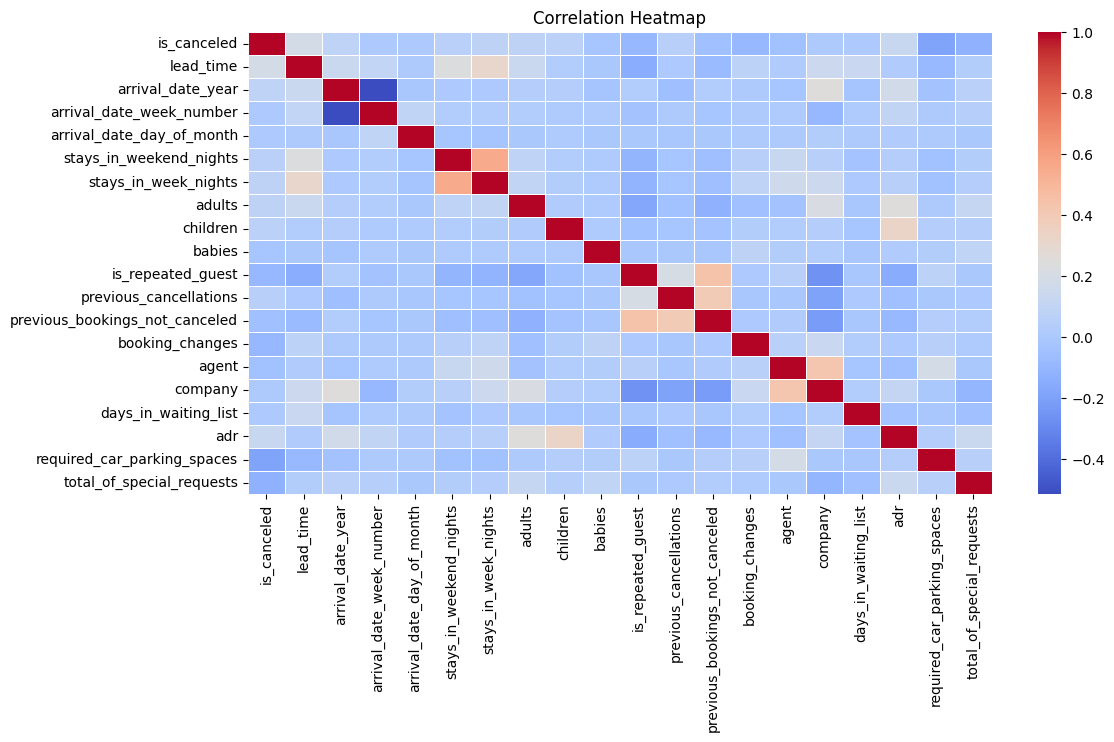

In [54]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

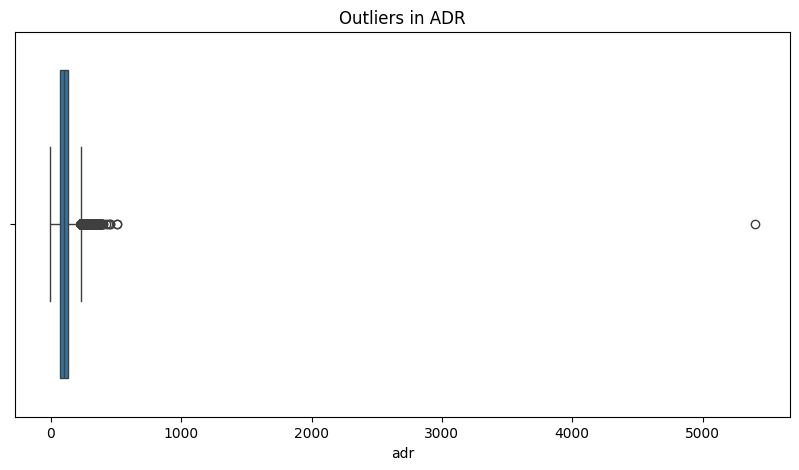

In [55]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["adr"])
plt.title("Outliers in ADR")
plt.show()

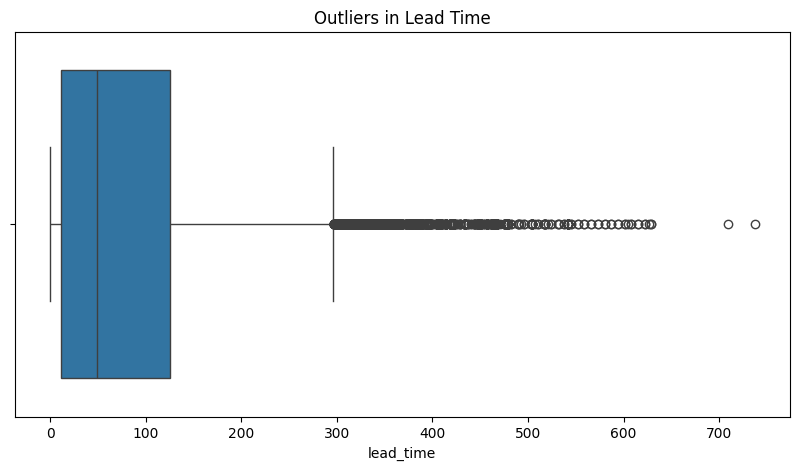

In [56]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["lead_time"])
plt.title("Outliers in Lead Time")
plt.show()

In [57]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
# Object datatypes columns usually house categorical data. To get details on the same
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,87396,87396,87396,86944,87396,87396,87396,87396,87396,87396,87396
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371


In [58]:
df.drop(['company', 'agent'], axis = 1, inplace = True)
df.dropna(inplace = True)
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [59]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940
mean,0.275903,80.193375,2016.211824,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,0.753497,106.574804,0.083448,0.699459,2016-08-31 15:45:23.478260736
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-19 00:00:00
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446971,86.100147,0.686016,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,10.041816,54.957439,0.280402,0.831840,NaN


In [60]:
df = df[df['adr']<5000]
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939.000000,86939
mean,0.275895,80.193895,2016.211827,26.841636,15.817918,1.007407,2.628763,1.878524,0.139213,0.010835,0.039234,0.030228,0.176710,0.271846,0.753505,106.513917,0.083449,0.699467,2016-08-31 15:48:36.927961088
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,2016-03-19 00:00:00
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.400000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.446967,86.100506,0.686019,13.654503,8.834465,1.028764,2.043758,0.625864,0.456788,0.113593,0.194153,0.369576,1.717895,0.728090,10.041873,51.942742,0.280403,0.831842,NaN


/tmp/ipython-input-3025382800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_canceled", data=df, palette="Set2")


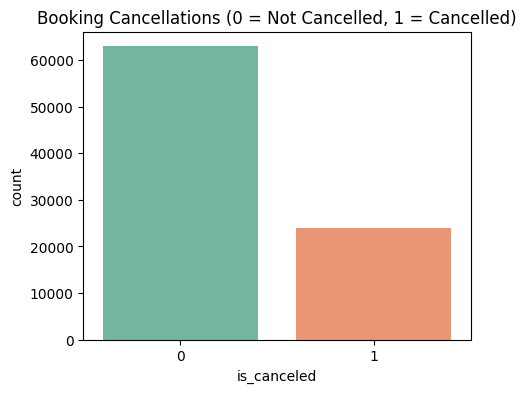

In [61]:
# Distribution of target variable (is_canceled)
plt.figure(figsize=(5,4))
sns.countplot(x="is_canceled", data=df, palette="Set2")
plt.title("Booking Cancellations (0 = Not Cancelled, 1 = Cancelled)")
plt.show()

/tmp/ipython-input-3683051395.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="hotel", data=df, palette="Set3")


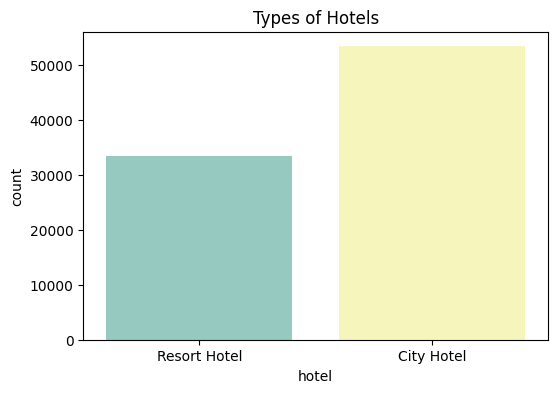

In [62]:
#  Hotel type distribution
plt.figure(figsize=(6,4))
sns.countplot(x="hotel", data=df, palette="Set3")
plt.title("Types of Hotels")
plt.show()

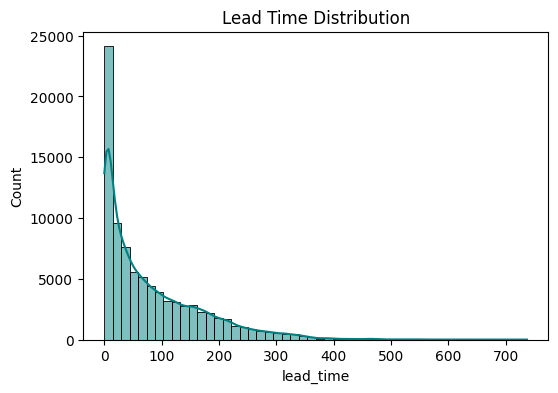

In [63]:
# Lead time distribution
plt.figure(figsize=(6,4))
sns.histplot(df["lead_time"], bins=50, kde=True, color="teal")
plt.title("Lead Time Distribution")
plt.show()

/tmp/ipython-input-3876786349.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="hotel", y="adr", data=df, palette="coolwarm")


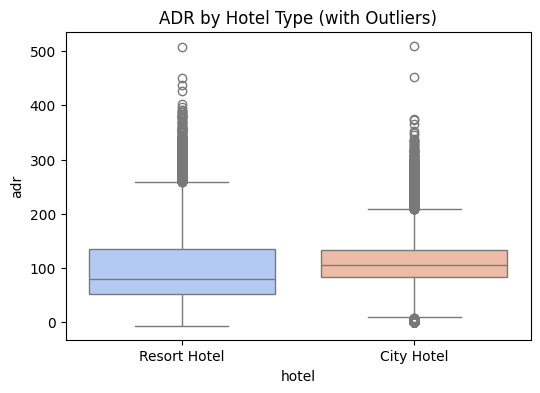

In [64]:
# Average Daily Rate (ADR) distribution
plt.figure(figsize=(6,4))
sns.boxplot(x="hotel", y="adr", data=df, palette="coolwarm")
plt.title("ADR by Hotel Type (with Outliers)")
plt.show()

/tmp/ipython-input-2573185831.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hotel", y="is_canceled", data=df, palette="viridis")


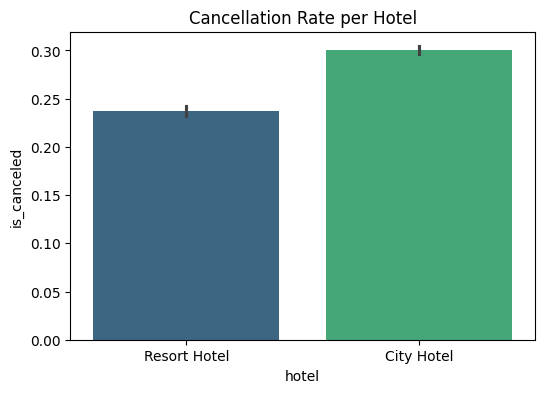

In [65]:
# Cancellation rate by hotel
plt.figure(figsize=(6,4))
sns.barplot(x="hotel", y="is_canceled", data=df, palette="viridis")
plt.title("Cancellation Rate per Hotel")
plt.show()

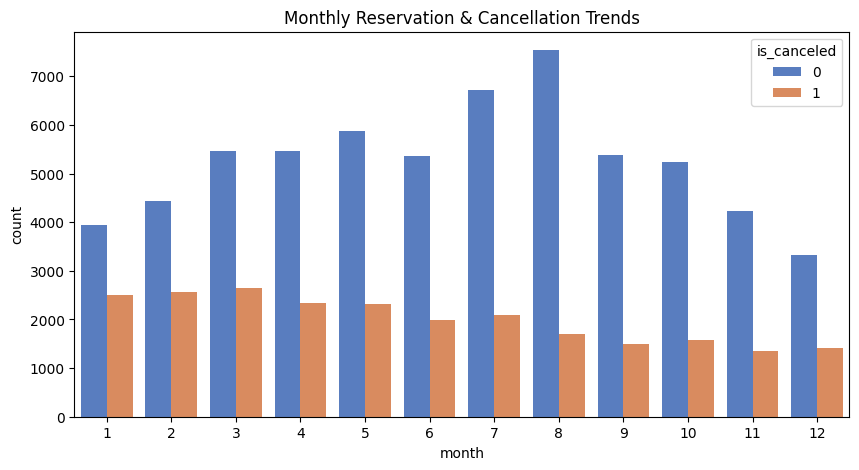

In [66]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df["month"] = df["reservation_status_date"].dt.month

plt.figure(figsize=(10,5))
sns.countplot(x="month", hue="is_canceled", data=df, palette="muted")
plt.title("Monthly Reservation & Cancellation Trends")
plt.show()

/tmp/ipython-input-1063916722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="mako")


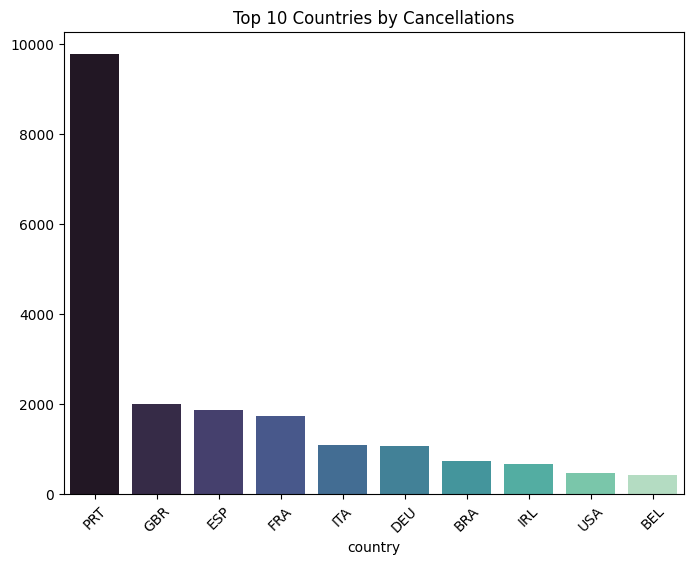

In [67]:
#  Country-wise top 10 cancellations
top_countries = df[df["is_canceled"]==1]["country"].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="mako")
plt.title("Top 10 Countries by Cancellations")
plt.xticks(rotation=45)
plt.show()

Feature engineering & Preprocessing


In [68]:
# total_guests, total_nights, is_family
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['is_family'] = np.where((df['children'] + df['babies']) > 0, 1, 0)


In [69]:
# drop leakage columns as required by project
leakage_cols = ['reservation_status', 'reservation_status_date']
for c in leakage_cols:
    if c in df.columns:
        df.drop(columns=c, inplace=True)

In [70]:
country_counts = df['country'].value_counts()
threshold = 300   # countries with <300 records grouped as Other (you can adjust)
small_countries = country_counts[country_counts < threshold].index
df['country_grouped'] = df['country'].replace(small_countries, 'Other')
df['country_freq'] = df['country_grouped'].map(df['country_grouped'].value_counts())

In [71]:
onehot_cols = [
    'hotel', 'arrival_date_month', 'meal', 'market_segment',
    'distribution_channel', 'deposit_type', 'customer_type',
    'reserved_room_type', 'assigned_room_type', 'is_family'
]

In [72]:
onehot_cols = [c for c in onehot_cols if c in df.columns]

df = pd.get_dummies(df, columns=onehot_cols, drop_first=True)

In [73]:
# Drop now-unneeded categorical originals
df.drop(columns=['country', 'country_grouped'], inplace=True, errors='ignore')

In [74]:
# target
y = df['is_canceled']
# drop target column from df if still present and any other columns not needed
X = df.drop(columns=['is_canceled', 'reservation_status_date'], errors='ignore')

# Also drop reservation_month if you want (or keep it)
if 'reservation_month' in X.columns:
    # keep it (numerical 1-12) — or convert to cyclical features if desired
    pass

print("\nFinal feature shape:", X.shape)
print("Number of features:", X.shape[1])


Final feature shape: (86939, 73)
Number of features: 73


In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("\nTrain/Test shapes:", X_train.shape, X_test.shape)


Train/Test shapes: (69551, 73) (17388, 73)
